<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-и-предобработка-данных." data-toc-modified-id="Шаг-1.-Загрузка-и-предобработка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка и предобработка данных.</a></span></li><li><span><a href="#Шаг-2.-Приоритизация-гипотез." data-toc-modified-id="Шаг-2.-Приоритизация-гипотез.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Приоритизация гипотез.</a></span></li><li><span><a href="#Шаг-3.-Анализ-A/B-теста." data-toc-modified-id="Шаг-3.-Анализ-A/B-теста.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Анализ A/B-теста.</a></span></li><li><span><a href="#Шаг-4.-Выводы" data-toc-modified-id="Шаг-4.-Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Выводы</a></span></li></ul></div>

# Проект Анализ бизнес показателей

В проекте аналазируем крупный интернет-магазин.
Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.

Будем оценивать результатов АВ теста анализировать по двум группам А и B по средней выручки и среднему чеку. Выявим есть ли разница между двумя группами, а если есть то как она повлияла.

**Цель проекта**: приоритизировать гипотезы, запустить A/B-тест и проанализировать результат. А так же принять решение: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Шаги проекта:  
1.Загрузка и предобработка данных.  
1.1.Загрузка данных.  
1.2.Изучим общую информацию о датафреймах.  
1.3. Предобработка данных  
2.Приоритизация гипотез    
2.1.Применение фреймворка ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
2.2.Применение фреймворка RICE для приоритизации гипотез. Отсортировать их поубыванию приоритета.  
2.3. Оценить как изменилась приоритизация гипотез при применении RICE вместо ICE.   
3.Анализ A/B-теста  
3.1.График кумулятивной выручки по группам.    
3.2.График кумулятивного среднего чека по группам.  
3.3.График относительного изменения кумулятивного среднего чека группы B к группе A.  
3.4.График кумулятивного среднего количества заказов на посетителя по группам.   
3.5.График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.  
3.6.Точечный график количества заказов по пользователям.   
3.7. 95-й и 99-й перцентили количества заказов на пользователя.   
3.8.Точечный график стоимостей заказов.   
3.9.95-й и 99-й перцентили  стоимости заказов.  
3.10.Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.   
3.11.Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.   
3.12.Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
3.13.Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.
4.Выводы  

#### Шаг 1. Загрузка и предобработка данных. 

**1.1.Загрузка данных.**
На данном этапе загрузили файл csv формата и библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
import math as mth
from pandas.plotting import register_matplotlib_converters
import warnings
#загрузили библиотеки которые понадобятся

In [2]:
try:
    hypothesis = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\ba\\hypothesis.csv')
    orders = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\ba\\orders.csv')
    visitors = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\ba\\visitors.csv')
    
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net//datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')
#загрузка данных

**1.2 Выведим первые  5 строк набора данных. Изучим общую информацию о датафреймах**

In [3]:
# установка параметра отображения для вывода полного текста в колонке
pd.set_option('display.max_colwidth', None)
print(hypothesis.head(5))
# восстановление стандартного значения после вывода
pd.reset_option('display.max_colwidth')

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  


In [4]:
hypothesis.info()
print(f"Объем данных 'users': {hypothesis.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Объем данных 'users': (9, 5)


In [5]:
total_hypothesis = hypothesis['Hypothesis'].nunique()
print(f"Всего гипотез: {total_hypothesis}")

Всего гипотез: 9


Получили данные объемом 9 строк и 5 столбцов, весом 488 байт.  
Всего имеется 9 гипотез, что логично т.к у нас 9 строк(заодно проверили не дублируются гипотезы)  
Название столбцов сменим на строчные буквы.    
Имеем следующие столбцы с данными:  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.    Пустых значений не имеем, посмотрим следующий датафрейм  
    Типы данных int(64) и object  соответствуют ожиданиям

In [6]:
orders.head(5)
#вывод 5 строк датафрейма

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()
print(f"Объем данных 'users': {orders.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Объем данных 'users': (1197, 5)


In [8]:
total_groups = orders['group'].nunique()
print(f"Всего групп: {total_groups}")

Всего групп: 2


Получили данные объемом 1 197 строк и 5 столбцов, весом 46,9 кб.
Так же у нас всего 2 группы, группа А и группа B
Пустых значений не имеем, посмотрим следующий датафрейм   

Имеем следующие столбцы с данными:  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  
Пустых значений не имеем, посмотрим следующий датафрейм.
В дальнейшим у столбца date приведем к типу данных соответсующий дате

In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()
print(f"Объем данных 'users': {visitors.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Объем данных 'users': (62, 3)


In [11]:
total_visitors = visitors['group'].nunique()
print(f"Всего групп: {total_visitors}")

Всего групп: 2


Получили данные объемом 62 строки и 3 столбца, весом 1,6 кб.  
Так же проверили что у нас 2 группы как и должно быть согласно датфрейму orders (  в случае если бы были лишние группы необходимо было бы удалить, но перед этим уточнить у отдела маркетинга).  
Пустых значений не имеем, посмотрим следующий датафрейм   

Имеем следующие столбцы с данными:  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста    
Пустых значений не имеем.
В дальнейшим у столбца date приведем к типу данных соответсующий дате

**1.3 Предобработка данных**

In [12]:
hypothesis.columns = hypothesis.columns.str.lower() #смена названий столбцов на строчные буквы
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Произвели смену названий столбцов в hypothesis на строчный вариант и проверили

**1.4.Обработка дубликатов**

In [13]:
# кол-во дубликатов во всем датафрейме
orders_duplicates = orders.duplicated().sum()
print("Количество дубликатов в датафрейме orders:", orders_duplicates)

visitors_duplicates = visitors.duplicated().sum()
print("Количество дубликатов в датафрейме visitors:", visitors_duplicates)


Количество дубликатов в датафрейме orders: 0
Количество дубликатов в датафрейме visitors: 0


Завершили первый этап, загрузили данные и ознакомились с ними.  
Сменили название столбцоы в датафрейме, проверили данные на дубликаты.  
Теперь можно приступать к следующим шагам для проведения теста и анализа.  

**1.5.Смена типа данных**

Как указывалось выше сменим формат дат у датафреймов orders и visitors на соответствующим датам и проверим

In [14]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
print(orders.dtypes)
print(visitors.dtypes)

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object
date        datetime64[ns]
group               object
visitors             int64
dtype: object


#### Шаг 2. Приоритизация гипотез. 

**2.1.Применение фреймворка ICE для приоритизации гипотез.**  
Отсортируем их по убыванию приоритета

Проведем один из самых популярных способов приоритизации задач ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»).   
Для проведения будет использоваться следующая формула:  
**ICE =  (Impact * Confidence) / Effrots**

In [15]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']  / hypothesis['efforts']

result_table = round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),2)
pd.set_option('display.max_colwidth', None) #для вывода названий всего текста гипотез

print(result_table)

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Из предоставленных данных можно сделать следующие выводы:

Наивысший приоритет ICE:

**Гипотеза 8: "Запустить акцию, дающую скидку на товар в день рождения"** имеет самый высокий показатель ICE (16.2). Это говорит о том, что эта гипотеза считается наиболее приоритетной с точки зрения оценки влияния, уверенности и легкости внедрения.  

Следующие приоритетные гипотезы:  

**Гипотеза 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и **гипотеза 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** также имеют высокие показатели ICE (13.33 и 11.2 соответственно).  

Другие гипотезы:

Гипотезы 6, 2, 1, 5, 3 и 4 имеют более низкие показатели ICE. Гипотеза 6 ("Показать на главной странице баннеры с актуальными акциями и распродажами") и гипотеза 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина") также обладают некоторым приоритетом, но меньшим по сравнению с тремя самыми высокими.
В целом, приоритет гипотез определяется на основе их показателей ICE, и первые три гипотезы считаются наиболее перспективными для дальнейшего тестирования и внедрения.

**2.2.Применение фреймворка RICE для приоритизации гипотез.**  
Отсортируем их по убыванию приоритета

Проведем модификацию ICE и используем метод приоритизации задач RICE (от англ. reach, impact, confidence, effort / ease «влияние, уверенность, усилия / простота»).   
Для проведения будет использоваться следующая формула:  
**ICE =  (Reach * Impact * Confidence) / Effrots**

In [16]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']  / hypothesis['efforts']

result_table = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
pd.set_option('display.max_colwidth', None) #для вывода названий всего текста гипотез

print(result_table)

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Из предоставленных данных можно сделать следующие выводы:

Наивысший приоритет (наибольший показатель RICE):

**Гипотеза 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** имеет самый высокий показатель RICE (112.0). Это говорит о том, что эта гипотеза считается наиболее приоритетной, учитывая не только оценки влияния, уверенности и легкости внедрения, но также и охвата пользователей.  

Следующие приоритетные гипотезы:

**Гипотеза 2: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** и **гипотеза 6: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"** также имеют высокие показатели RICE (56.0 и 40.0 соответственно).

Другие гипотезы:
Гипотезы 0, 8, 3, 1, 5 и 4 имеют более низкие показатели RICE. Гипотеза 8 ("Запустить акцию, дающую скидку на товар в день рождения") обладает высокими оценками влияния и уверенности, но её охват ниже по сравнению с первыми тремя.  
В целом, приоритет гипотез в данном случае также определяется на основе их показателей RICE, которые учитывают охват пользователей. Гипотеза 7 считается наиболее перспективной для дальнейшего тестирования и внедрения.

**2.3.Оценить как изменилась приоритизация гипотез при применении RICE вместо ICE.**  

При применении RICE вместо ICE для приоритизации гипотез происходит учет дополнительного фактора - охвата пользователей (Reach). RICE учитывает не только влияние гипотезы и уверенность в её эффективности, но и то, скольких пользователей она затронет.  

Исходя из предоставленных данных, сравним приоритеты гипотез при использовании ICE и RICE:  

Приоритеты гипотез по **ICE**:  

**Гипотеза 8 (ICE: 16.2)  
Гипотеза 0 (ICE: 13.33)  
Гипотеза 7 (ICE: 11.2)**  

Приоритеты гипотез по **RICE**:  

**Гипотеза 7 (RICE: 112.0)  
Гипотеза 2 (RICE: 56.0)  
Гипотеза 0 (RICE: 40.0)**

Изменения в приоритетах:

Гипотеза 7 (Добавить форму подписки) стала наивысшей приоритетной, когда учитывается охват пользователей (RICE), хотя в первоначальной оценке по ICE она была на третьем месте.  
Гипотеза 2 (Добавить блоки рекомендаций товаров) также поднялась в рейтинге по RICE.  
Гипотеза 8 (Запустить акцию в день рождения) потеряла приоритет при учете охвата пользователей.  
Таким образом, применение RICE привело к изменению приоритетов в пользу гипотез, у которых высокие оценки влияния, уверенности и значительный охват пользователей.  

После проведения RICE и ICE порядок проверки гипотез можно определить на основе их приоритета, который был вычислен с использованием RICE. Гипотезы с более высокими показателями RICE считаются более приоритетными для проверки и тестирования. Список для проверки гипотез может выглядеть следующим образом:  
**1.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (Гипотеза 7)**  
Эта гипотеза имеет самый высокий показатель RICE и, следовательно, считается наиболее приоритетной.  
**2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (Гипотеза 2)**  
Вторая по приоритету гипотеза с высоким показателем RICE.  
**3.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (Гипотеза 0)**  
Третья по приоритету гипотеза.  
**4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (Гипотеза 6)**  
Эта гипотеза также имеет высокий показатель RICE и следует за третьим приоритетом.  
**5.Запустить акцию, дающую скидку на товар в день рождения (Гипотеза 8)**  
Эта гипотеза имеет меньший охват, но она все равно может быть проверена.  

#### Шаг 3. Анализ A/B-теста. 

**3.1.График кумулятивной выручки по группам.**  

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:     
date — дата;  
group — группа A/B-теста (A или B);  
orders — кумулятивное количество заказов на указанную дату в указанной группе;  
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;  
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);   
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.  
Создадим массив уникальных пар значений дат и групп, а так же соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
Агрегируем значения.

In [17]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10))


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845
5 2019-08-03     B      61      59   380996      1803
6 2019-08-04     A      84      77   425699      2562
7 2019-08-04     B      78      75   489567      2573
8 2019-08-05     A     109     100   549917      3318
9 2019-08-05     B     101      98   581995      3280


In [18]:
#проверить минимальные и максимальные даты в исходных данных
min_date_orders = orders['date'].min()
max_date_orders = orders['date'].max()

min_date_visitors = visitors['date'].min()
max_date_visitors = visitors['date'].max()

#сравнить с минимальными и максимальными датами в cumulativeData
min_date_cumulative = cumulativeData['date'].min()
max_date_cumulative = cumulativeData['date'].max()

print("Минимальная дата в orders:", min_date_orders)
print("Максимальная дата в orders:", max_date_orders)

print("\nМинимальная дата в visitors:", min_date_visitors)
print("Максимальная дата в visitors:", max_date_visitors)

print("\nМинимальная дата в cumulativeData:", min_date_cumulative)
print("Максимальная дата в cumulativeData:", max_date_cumulative)


Минимальная дата в orders: 2019-08-01 00:00:00
Максимальная дата в orders: 2019-08-31 00:00:00

Минимальная дата в visitors: 2019-08-01 00:00:00
Максимальная дата в visitors: 2019-08-31 00:00:00

Минимальная дата в cumulativeData: 2019-08-01 00:00:00
Максимальная дата в cumulativeData: 2019-08-31 00:00:00


Сделали сверку дат в исходных датах и cumulativeData. Все даты соответствуют друг друг можем строить графики

Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

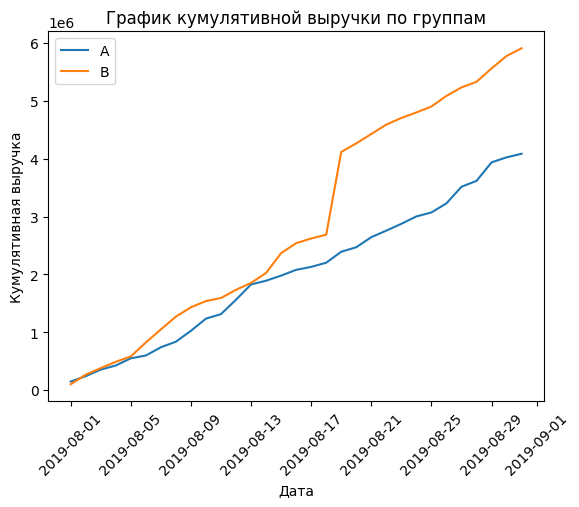

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()

Однозначно видим, что выручка по группы B почти за весь период была выше выручки группы A.  
При этом выручки были равны только в период с 1 августа 2019 года по 5 августа, а так же 13 августа 2019 года.   
Затем выручка группы B начиная с 17 августа превосходит выручку группы  A почти в два раза, хотя выручка группы A так же возросла.
  
Исходя из данных можно предполагать что в группу B попали заказы с аномально большими заказми

**3.2.График кумулятивного среднего чека по группам.**  

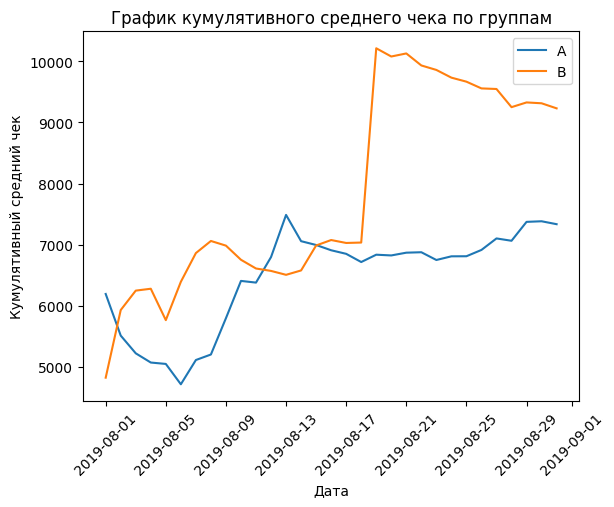

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()

In [21]:
specific_date_data = cumulativeData[cumulativeData['date'] == '2019-08-25']
print(specific_date_data)

         date group  orders  buyers  revenue  visitors
48 2019-08-25     A     451     409  3070704     14943
49 2019-08-25     B     507     466  4901584     15127


Можем отметить что 1 августа 2019 средний чек группы B был ниже среднего чека группы A.  
А вот 13 августа средний чек был выше у группы A, но с  17 августа  группу B  и до конца августа средний чек остается выше в 2 раза. Имеется предположения что для группы B были предложены лучше условия от чего пользователи совершали более дорогие заказы. Возьмем например дату где средний чек выше в два раза для этого выше выведена таблица за  25 августа и явно видно что заказов у группы B больше всего лишь на 41 заказ (12%) группы А, но вот покупку совершили 466 человек из 507, почти 80,7% получается средний чек обусловлен тем, что заказы завершили до конца т.е до покупке в интернет магазине.У группы А процент совершения сделки составляет 90% (409/451) т.е с момента оформления заказ до покупки.  Тогда есть основание пологать что в Группу B попали более дорогие заказы.

**3.3.График относительного изменения кумулятивного среднего чека группы B к группе A.**  

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

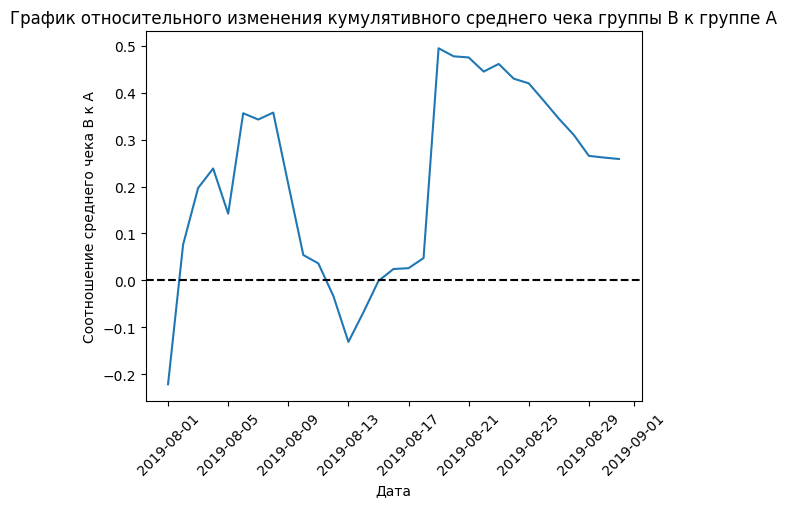

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Соотношение среднего чека B к A')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

Как раз  17 августа мы видим как  график различия между сегментами резко «скачет».

**3.4.График кумулятивного среднего количества заказов на посетителя по группам**  

Text(0.5, 1.0, 'График кумулятивного среднего количества заказов на посетителя по группам')

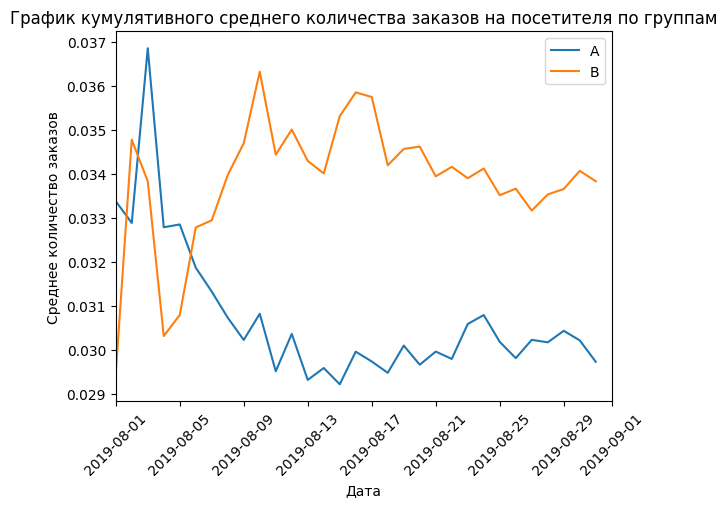

In [23]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-09-01'))

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

Только в начале периода графики хоть где-то пересикались, затем с 5 сентября они стали противоположными у группы B среднее количество заказов вырвалось вперёд и зафиксировалось,а вот у группы А все пошло вниз и зафиксировалось.

**3.5.График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**  

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

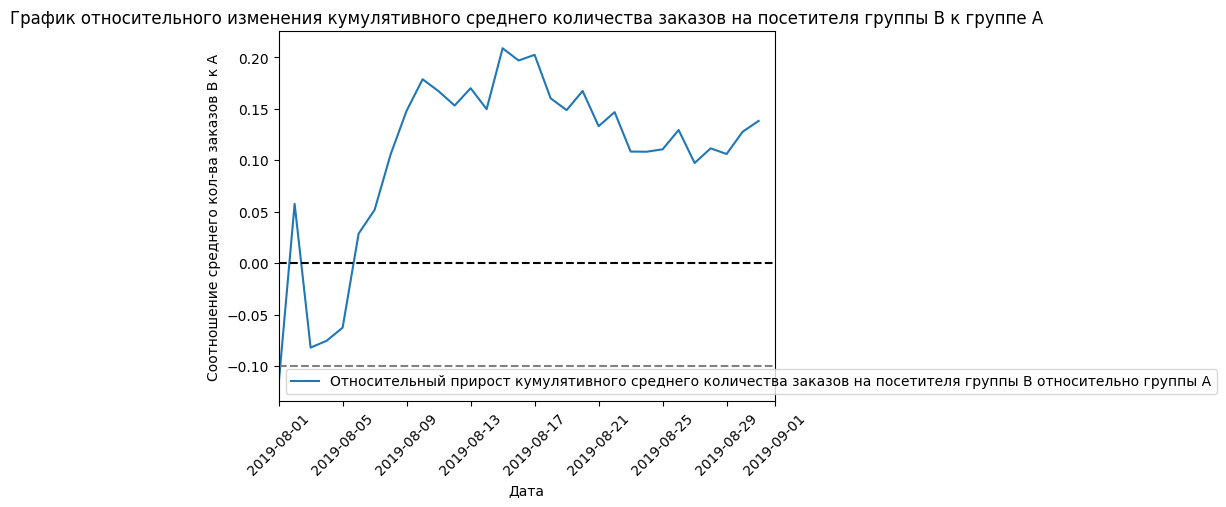

In [24]:
import matplotlib.dates as mdates


mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlim(mdates.datestr2num('2019-08-01'), mdates.datestr2num('2019-09-01'))

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Соотношение среднего кол-ва заказов B к A')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд  и уже больше не отпускалась и была на уровне 10-15%.  
Стоит проанализировать аномалии, возможно, они изменят картину.

**3.6.Точечный график количества заказов по пользователям**  

In [25]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitors', 'transaction']

print(ordersByUsers.sort_values(by='transaction', ascending=False).head(10))

        visitors  transaction
1023  4256040402           11
591   2458001652           11
569   2378935119            9
487   2038680547            8
44     199603092            5
744   3062433592            5
55     237748145            5
917   3803269165            5
299   1230306981            5
897   3717692402            5


Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

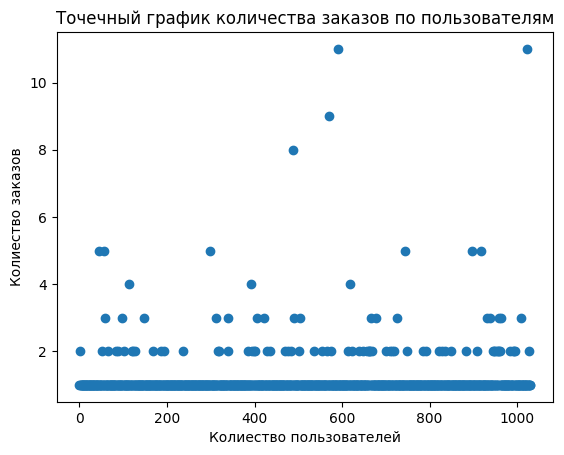

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transaction'])
plt.xlabel('Колиество пользователей')
plt.ylabel('Колиество заказов')
plt.title('Точечный график количества заказов по пользователям')

Большинство пользователей совершило всего 1 заказ. Большинство пользователей, заказавших более 4х раз, совсем мало. Они вполне могут быть аномальными. В основном все пользователи на уровне от 1-3х заказов

**3.7. 95-й и 99-й перцентили количества заказов на пользователя**  

Посчитаем выборочные перцентили количества заказов на одного пользователя

In [27]:
print(np.percentile(ordersByUsers['transaction'], [90, 95, 99])) 

[1. 2. 4.]


Первое значение, 1.0, соответствует 90-му процентилю.  
Второе значение, 2.0, соответствует 95-му процентилю.  
Третье значение, 4.0, соответствует 99-му процентилю.  
Иными словами:  

90% пользователей совершили 1 транзакцию или менее.   
95% пользователей совершили 2 транзакции или менее.  
99% пользователей совершили 4 транзакции или менее.  


Будем строгими, то можем считать заказы выше 99-го процентиля (4) потенциальными аномалиями , а именно выше 5 заказов.

**3.8.Точечный график стоимостей заказов.**

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


Text(0.5, 1.0, 'Точечный график стоимостей заказов')

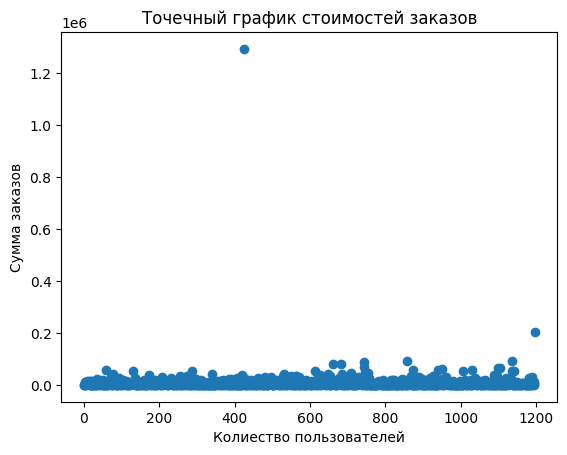

In [28]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'] ) 

plt.xlabel('Колиество пользователей')
plt.ylabel('Сумма заказов')
plt.title('Точечный график стоимостей заказов')

Из графика видно что в есть заказы  стоимостью 1 294 500 который находится в группе B и был совершен 2019-08-19 и это явно выброс т.к  выглядит весьма аномально.

**3.9. 95-й и 99-й  перцентили стоимости заказов**

In [29]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [90, 95, 99])) 

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
6      398296753  2900797465 2019-08-15     1860     B
7     2626614568    78758296 2019-08-15     1044     A
8     1576988021   295230930 2019-08-15    13710     A
9     1506739906  1882260405 2019-08-15     1855     B
[18168.  28000.  58233.2]


Получили процентили:  
90-й процентиль: 18 168  
95-й процентиль: 28 000  
99-й процентиль: 58 233.2  
Будем консервативными, то можем считать заказы выше 95-го процентиля (28 000) потенциальными аномалиями , а именно выше 30 000.

**3.10.Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.  
Сформулируем гипотезы.  
**Нулевая:** различий в среднем количестве заказов между группами нет.  
**Альтернативная:** различия в среднем между группами есть.    

Для этого необходимо подготовить и досоздать данные:
date — дата;  
ordersPerDateA — количество заказов в выбранную дату в группе A;  
revenuePerDateA — суммарная выручка в выбранную дату в группе A;  
ordersPerDateB — количество заказов в выбранную дату в группе B;  
revenuePerDateB — суммарная выручка в выбранную дату в группе B;  
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;  
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;  
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;  
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;  
visitorsPerDateA — количество пользователей в выбранную дату в группе A;  
visitorsPerDateB — количество пользователей в выбранную дату в группе B;  
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;  
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.  

In [30]:
import scipy.stats as stats
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

print("P-value для теста Манна-Уитни:{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение средних значений:{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Значение p-value 0.01679 оценивает вероятность получения наблюдаемых данных, если гипотеза о равенстве двух выборок верна. В данном случае p-value довольно мало (меньше обычно используемого уровня значимости 0.05), что позволяет нам отвергнуть нулевую гипотезу о том, что нет статистически значимых различий между группами.  
Относительный прирост конверсии в группе B по сравнению с группой A: 0.138  
Это относительное изменение конверсии. Результат указывает на то, что конверсия в группе B выше на 13.8% по сравнению с группой A.    

*Общий вывод: Есть основания полагать, что изменение в группе B действительно оказывает влияние на конверсию, и она статистически значимо выше, чем в группе A.*  

**3.11.Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**   

In [36]:
print("P-value для теста Манна-Уитни по выручке: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменение средней выручки между группами: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value для теста Манна-Уитни по выручке: 0.729
Относительное изменение средней выручки между группами: 0.259


Значение  0.729 p-value, полученное в результате теста Манна-Уитни довольно велико (гораздо больше обычно используемого уровня значимости 0.05), что говорит о том, что нет статистически значимых различий в среднем чеке между группами.  
Относительное изменение среднего чека в группе B по сравнению с группой A составило 0.259. Говорит о том, что средний чек в группе B на 25.9% выше, чем в группе A.   

*Общий вывод: На "сырых" данных нет статистически значимых различий в среднем чеке между группами. Однако, средний чек в группе B выше почти на 26% по сравнению с группой A.*

Приступим к анализу аномалий.

**3.12.Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.** 

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублям.  
А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.  

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 5 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.  

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 5]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 5]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])


1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
52


Получилось 52 строки которые мы можем удалить, после удаления необходимо будет выяснить, есть ли существенные различия между группами с очищенными данными.

**3.12.Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам тестаю Сохраним в sampleAFiltered и sampleBFiltered

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

print("P-value после фильтрации данных: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительное изменение средних значений после фильтрации данных:{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value после фильтрации данных: 0.019
Относительное изменение средних значений после фильтрации данных:0.139



P-значение в тесте Манна-Уитни для отфильтрованных данных равно 0,019, что немного выше, чем P-значение для неотфильтрованных данных (0,01679). Это говорит о том, что после удаления аномальных пользователей различие в конверсии между группами A и B по-прежнему является статистически значимым.

Относительная разница в среднем размере заказа для отфильтрованных данных составляет 0,139, что схоже с неотфильтрованными данными (0,138). Это указывает на то, что даже после удаления аномальных пользователей средний размер заказа в группе B остается выше, чем в группе A.

В заключение, процесс фильтрации не привел к существенным изменениям результатов, и вывод о статистически значимом различии в конверсии и среднем размере заказа между группами A и B по-прежнему остается в силе.

**3.13.Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [34]:
print("P-value после фильтрации данных: {0:.3f}"
        .format(stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("Относительное изменение средних значений после фильтрации данных:{0:.3f}"
        .format( orders[
            np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'].mean()
        / orders[
            np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'].mean()))

P-value после фильтрации данных: 0.911
Относительное изменение средних значений после фильтрации данных:0.987


Исходя из результатов анализа:
Для "сырых" данных:P-value (0.729) и Относительное изменение среднего чека (0.259)  

Для "очищенных" данных: P-value (0.911): Значение p-value также значительно превышает уровень статистической значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.  

Относительное изменение среднего чека (-0.013)отрицательное, что может указывать на то, что средний чек в группе B меньше, чем в группе A. Однако, как и в предыдущем случае, эти различия не являются статистически значимыми.  
Для "сырых" данных средний чек в группе B на 25.9% выше, чем в группе A.  
После очистки данных от выбросов относительное изменение среднего чека стало -0.013, что указывает на отрицательное изменение. То есть, средний чек в группе B на 1.3% меньше, чем в группе A.  
Эти значения свидетельствуют о том, что данные по среднему чеку в группах существенно изменялись после очистки от выбросов. Однако, стоит учесть, что статистическая значимость не подтверждает эти различия. Таким образом, можно предположить, что выбросы могли исказить первоначальные результаты, и после их удаления, различия в среднем чеке стали незначительными.

#### Шаг 4. Выводы

Был проанализирован крупный интернет-магазин. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.  Для анализа были использованы три файла (hypothesis,orders, visitors), по которым была проведена предобработка данных. 
По данным у нас имеется две группы A и B.  
**Для начала была проведена Приоритизация гипотез**. Их всего 9.  
При применении фреймворка ICE для приоритизации гипотез  
Наивысший приоритет ICE:  
**Гипотеза 8**(ICE: 16.2): "Запустить акцию, дающую скидку на товар в день рождения" имеет самый высокий показатель ICE (16.2). 
**Гипотеза 0**(ICE: 13.33): "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"   и **гипотеза 7**(ICE: 11.2): "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".    
А вот для применении фреймворка RICE Наивысший приоритет:  
**Гипотеза 7**: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" имеет самый высокий показатель RICE (112.0). Это говорит о том, что эта гипотеза считается наиболее приоритетной, учитывая не только оценки влияния, уверенности и легкости внедрения, но также и охвата пользователей.  
**Гипотеза 2**: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и **гипотеза 6**: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" также имеют высокие показатели RICE (56.0 и 40.0 соответственно).  
При применении RICE вместо ICE для приоритизации гипотез происходит учет дополнительного фактора - охвата пользователей (Reach). RICE учитывает не только влияние гипотезы и уверенность в её эффективности, но и то, скольких пользователей она затронет.
При сравнении ICE и RICE изменения в приоритетах следующее:    
**Гипотеза 7 (Добавить форму подписки)** стала наивысшей приоритетной, когда учитывается охват пользователей (RICE), хотя в первоначальной оценке по ICE она была на третьем месте.  
**Гипотеза 2 (Добавить блоки рекомендаций товаров)** также поднялась в рейтинге по RICE.  
**Гипотеза 8 (Запустить акцию в день рождения)** потеряла приоритет при учете охвата пользователей.  
Таким образом, применение RICE привело к изменению приоритетов в пользу гипотез, у которых высокие оценки влияния, уверенности и значительный охват пользователей.    
Список для проверки гипотез может выглядеть следующим образом:  
1.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (Гипотеза 7)  
Эта гипотеза имеет самый высокий показатель RICE и, следовательно, считается наиболее приоритетной.   
2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (Гипотеза 2)  
Вторая по приоритету гипотеза с высоким показателем RICE.  
3.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (Гипотеза 0)  
Третья по приоритету гипотеза.  
4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (Гипотеза 6)  
Эта гипотеза также имеет высокий показатель RICE и следует за третьим приоритетом.  
5.Запустить акцию, дающую скидку на товар в день рождения (Гипотеза 8)  
Эта гипотеза имеет меньший охват, но она все равно может быть проверена.  
**Анализ A/B-теста.**  
Были созданы различные графики из которых мы узнали следующее:  
 - График кумулятивной выручки по группам. Однозначно видим, что выручка по группы B почти за весь период была выше выручки группы A. При этом выручки были равны только в период с 1 августа 2019 года по 5 августа, а так же 13 августа 2019 года.
Затем выручка группы B начиная с 17 августа превосходит выручку группы A почти в два раза, хотя выручка группы A так же возросла.
 - График кумулятивного среднего чека по группам.Можем отметить что 1 августа 2019 средний чек группы B был ниже среднего чека группы A. А вот 13 августа средний чек был выше у группы A, но с 17 августа группу B и до конца августа средний чек остается выше в 2 раза. Имеется предположения что для группы B были предложены лучше условия от чего пользователи совершали более дорогие заказы. Возьмем например дату где средний чек выше в два раза для этого выше выведена таблица за 25 августа и явно видно что заказов у группы B больше всего лишь на 41 заказ (12%) группы А, но вот покупку совершили 466 человек из 507, почти 80,7% получается средний чек обусловлен тем, что заказы завершили до конца т.е до покупке в интернет магазине.У группы А процент совершения сделки составляет 90% (409/451) т.е с момента оформления заказ до покупки. Тогда есть основание пологать что в Группу B попали более дорогие заказы.  
 - График кумулятивного среднего количества заказов на посетителя по группам. Только в начале периода графики хоть где-то пересикались, затем с 5 сентября они стали противоположными у группы B среднее количество заказов вырвалось вперёд и зафиксировалось,а вот у группы А все пошло вниз и зафиксировалось.
Были расчитаны 95-й и 99-й перцентили количества заказов на пользователя
90% пользователей совершили 1 транзакцию или менее, 95% пользователей совершили 2 транзакции или менее, 99% пользователей совершили 4 транзакции или менее.  
Были расчитаны 95-й и 99-й перцентили стоимости заказов. 90-й процентиль равен 18 168, 95-й процентиль равен 28 000, 99-й процентиль равен 58 233.2    

Во время тест была проведена статистическая значимость различий между сырыми и очищенными данными на уровне в среднем количестве заказов на посетителя между группами и среднем чеке.    
На основании 95 и 99 перцентилей были отобраны за анамольные пользователи, кто совершил от 5 заказов или совершил заказ дороже 30 000 рублей. Всего было таких 52 записей.

Конверсия:  
По "сырым" данным статистическая значимость различий в конверсии между группами A и B подтверждена (p-value = 0.01679), с относительным приростом конверсии в группе B на 13.8%.  
После удаления аномальных пользователей различия в конверсии по-прежнему статистически значимы (p-value = 0.019), с относительным приростом конверсии в группе B на 13.9%.  
Средний чек:  
По "сырым" данным отсутствует статистически значимое различие в среднем чеке между группами (p-value = 0.729), но относительное изменение среднего чека в группе B составляет 25.9% выше.  
После удаления аномальных пользователей статистической значимости различий в среднем чеке нет (p-value = 0.911), и относительное изменение среднего чека становится -0.013, что может указывать на небольшое уменьшение среднего чека в группе B по сравнению с группой A.  
**Выводы:**  
Очистка данных от выбросов существенно повлияла на результаты по среднему чеку, но статистическая значимость этих различий отсутствует.  
По конверсии результаты остаются статистически значимыми и подтверждают, что изменение в группе B положительно влияет на конверсию.  

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным и зафиксировать победу группы B т.к нашей основной целью является увеличение выручки. 
В данном случае, мы имеем основания полагать, что изменения, внесенные в группе B, действительно положительно влияют на результаты и приносят больше выручки.  
